DS Assignment 14

Decision Treee

Fraud_check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [3]:
data = pd.read_csv('/content/Fraud_check.csv')

In [4]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Feature Engineering

In [7]:
data['target'] = [1 if x>30000 else 0 for x in data['Taxable.Income']]

In [8]:
data = data.replace({'YES':1,'NO':0})

In [9]:
fraud_data = pd.get_dummies(data)

In [10]:
fraud_data.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,target,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,1,0,0,1
1,1,33700,134075,18,1,1,1,0,0
2,0,36925,160205,30,1,1,0,1,0
3,1,50190,193264,15,1,1,0,0,1
4,0,81002,27533,28,0,1,0,1,0


Data Visualization

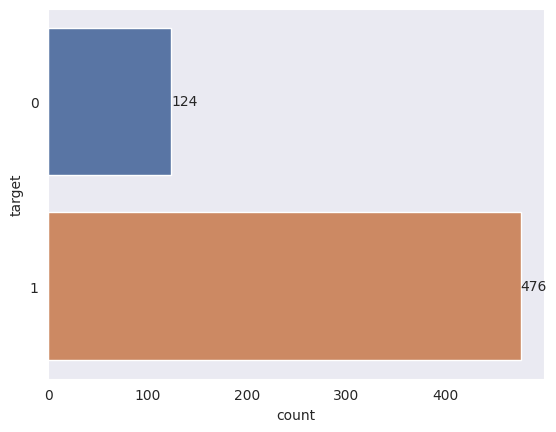

In [11]:
ax = sns.countplot(data=fraud_data, y='target', palette='deep')
ax.bar_label(ax.containers[0]);

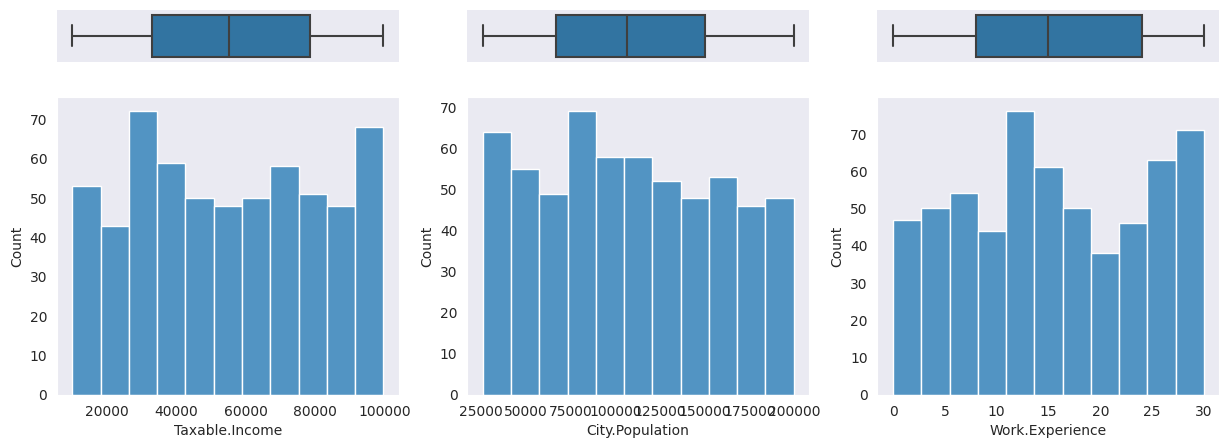

In [12]:
num_vars = ['Taxable.Income','City.Population','Work.Experience']

def plotboxhist(vars):
    figs, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=len(vars), figsize=(5*len(vars),5), gridspec_kw={'height_ratios':(0.15,0.85)})
    for i in range(len(vars)):
        sns.boxplot(data=fraud_data, x=vars[i], ax=ax_box[i])
        sns.histplot(data=fraud_data, x=vars[i], ax=ax_hist[i])
        sns.despine(ax=ax_box[i], left=True, bottom=True)
        ax_box[i].set_xticks([])
        ax_box[i].set_yticks([])
        ax_box[i].set_xlabel('')
    plt.show()

plotboxhist(num_vars)

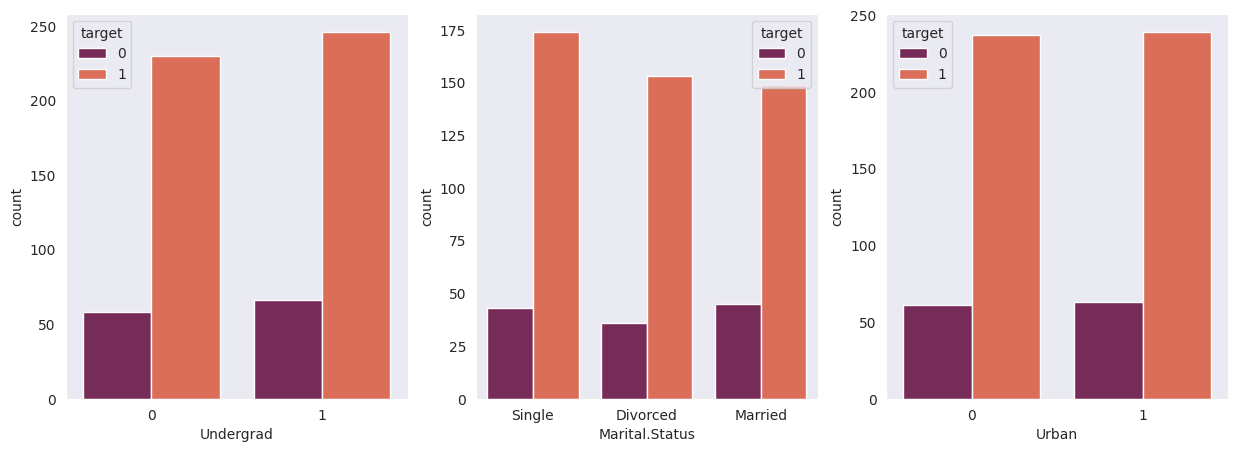

In [13]:
cat_var=['Undergrad','Marital.Status','Urban']

plt.figure(figsize=(15,5)),
for i in range(len(cat_var)):
    plt.subplot(1,3,i+1)
    sns.countplot(data=data, x=cat_var[i], hue='target', palette='rocket')

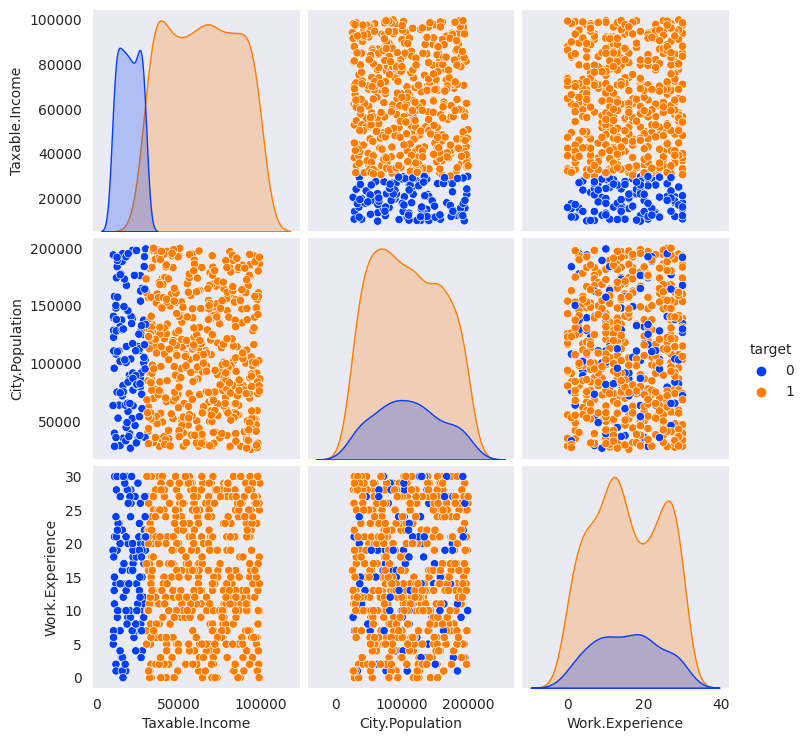

In [14]:
sns.pairplot(data=data.drop(cat_var,axis=1), hue='target', palette='bright')

Preparing data for model

In [15]:
x = fraud_data.drop(['Taxable.Income','target'], axis=1)
y = fraud_data['target']

In [16]:
x

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,1,0,0,1
1,1,134075,18,1,1,0,0
2,0,160205,30,1,0,1,0
3,1,193264,15,1,0,0,1
4,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,0
596,1,55369,2,1,1,0,0
597,0,154058,0,1,1,0,0
598,1,180083,17,0,0,1,0


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: target, Length: 600, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
model

DecisionTreeClassifier(criterion='entropy')

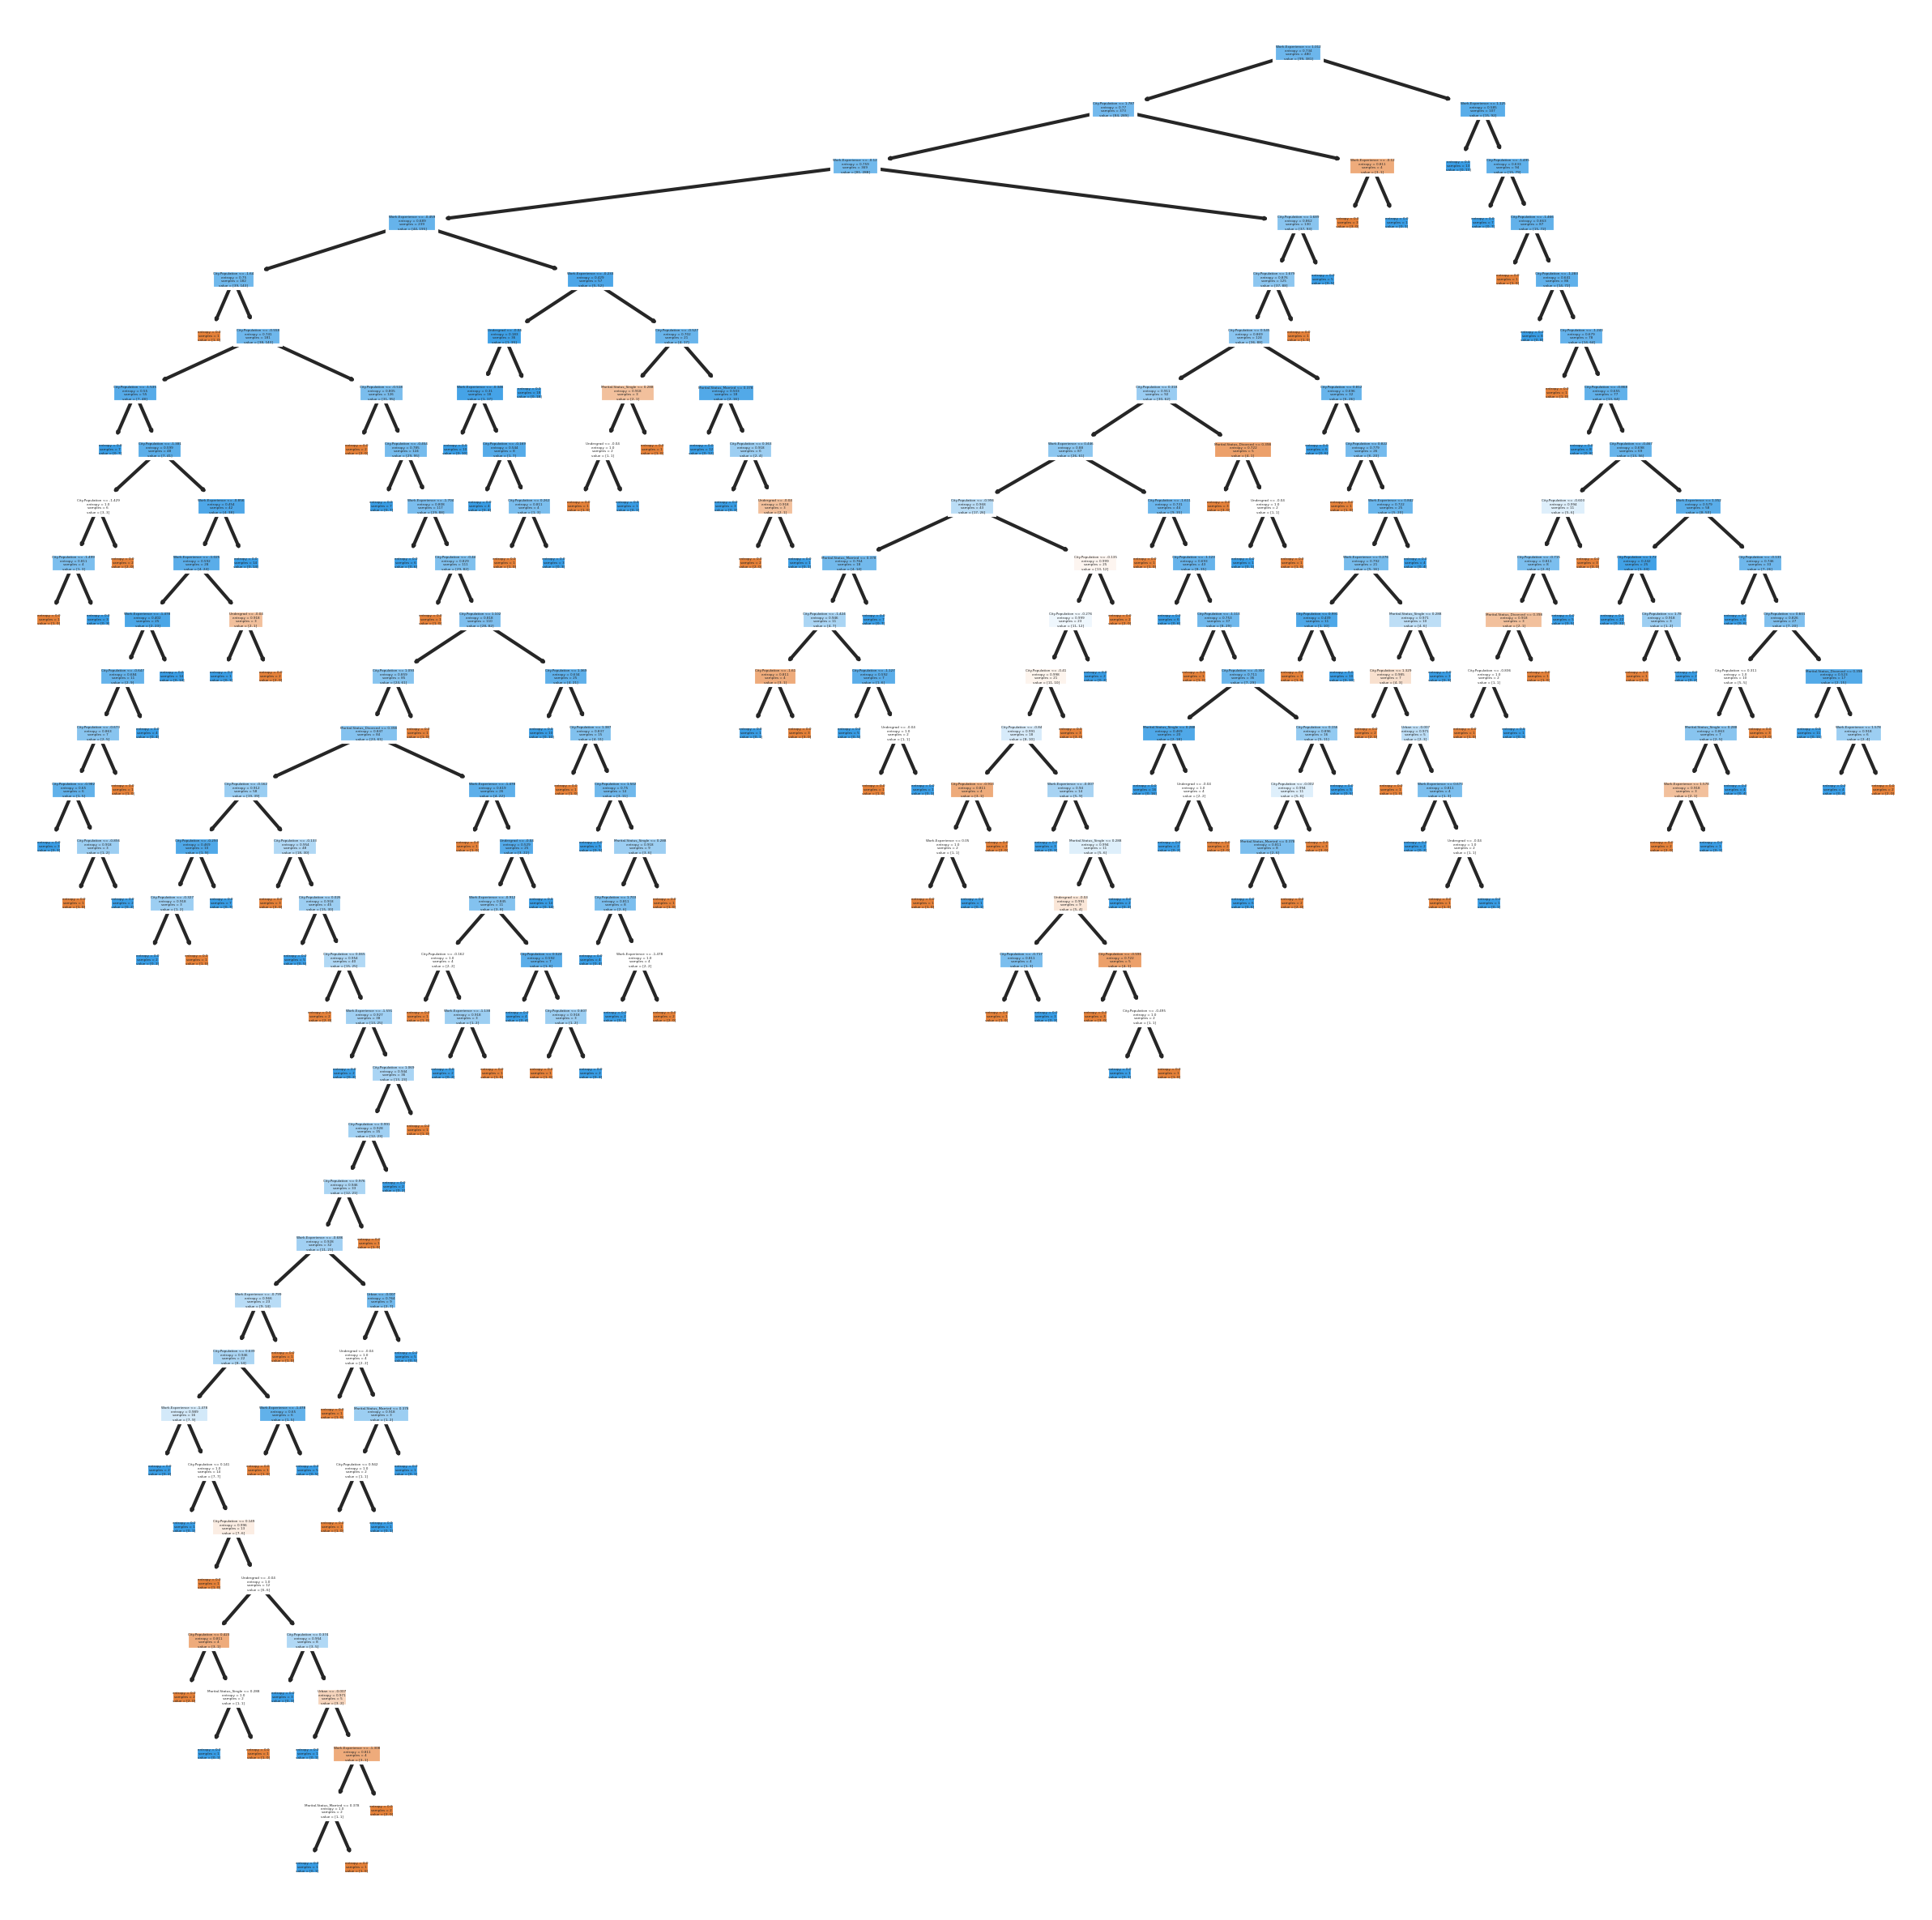

In [22]:
fn = x.columns
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
plot_tree(model,feature_names=fn,filled=True);

In [23]:
model.feature_importances_

array([0.07631054, 0.5715898 , 0.21556988, 0.01729966, 0.02227461,
       0.04581583, 0.05113968])

In [24]:
preds = model.predict(x_test)

In [25]:
pd.crosstab(y_test,preds)

col_0,0,1
target,,
0,9,16
1,24,71


In [26]:
#Finding Accuracy

In [27]:
np.mean(y_test==preds)

0.6666666666666666